In [8]:
# Data Reference: Automobile. (1987). UCI Machine Learning Repository.

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

,make,price,price-binned,symboling,aspiration,num-of-doors,fuel-type_diesel,fuel-type_gas,body-style,drive-wheels,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,normalized-losses
3,audi,13950,Low,2,std,four,0,1,sedan,fwd,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,164.0
4,audi,17450,Medium,2,std,four,0,1,sedan,4wd,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,164.0
6,audi,17710,Medium,1,std,four,0,1,sedan,fwd,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,158.0
8,audi,23875,Medium,1,turbo,four,0,1,sedan,fwd,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,158.0
10,bmw,16430,Medium,2,std,two,0,1,sedan,rwd,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,192.0
11,bmw,16925,Medium,0,std,four,0,1,sedan,rwd,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,192.0
12,bmw,20970,Medium,0,std,two,0,1,sedan,rwd,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,188.0
13,bmw,21105,Medium,0,std,four,0,1,sedan,rwd,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,188.0
18,chevrolet,5151,Low,2,std,two,0,1,hatchback,fwd,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,121.0
19,chevrolet,6295,Low,1,std,two,0,1,hatchback,fwd,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,98.0


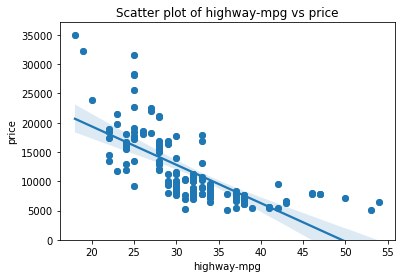

In [21]:
# Data Path Block
csv = pd.read_csv("/Users/jk/Desktop/A/Study/Data Analysis/Practice Folder/automobile.csv")


# Data Formatting Block
pd.set_option("display.max_rows", None)

df = pd.DataFrame(csv.replace("?", np.NaN))
df.dropna(inplace = True) # Remove "NaN" values for data cleansing
df = pd.get_dummies(df, columns=['fuel-type'])
df["price"] = df["price"].astype(int) # convert float64 values to in64 for pandas bins function


# Data Binning Block
bins = np.linspace(min(df["price"]), max(df["price"]), 4) # Create values for variable "bin_label"
bin_label = ["Low", "Medium", "High"]
df["price-binned"] = pd.cut(df["price"], bins, labels = bin_label, include_lowest = True) # Add "price-binned" column

df = df[['make', 'price', 'price-binned', 'symboling', 'aspiration', 'num-of-doors', 'fuel-type_diesel', 'fuel-type_gas', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'normalized-losses']]

# Data Normalization Block
df["length"] = df["length"]/df["length"].max() # standarize scale of the value
df["height"] = df["height"]/df["height"].max() # standarize scale of the value
df["width"] = df["width"]/df["width"].max() # standarize scale of the value


# Quantitative Table 
# price_binned_count = df["price-binned"].value_counts().to_frame()
# price_binned_count.rename(columns = {"price-binned":"value_counts"}, inplace = True)

# display(price_binned_count)


# Data Visualization Block 1
## Scatter plot of Engine Size vs Price
# x = df["engine-size"] # engine-size vs price
# y = df["price"]

# plt.title("Scatter plot of Engine Size vs Price")
# plt.xlabel("Engine Size")
# plt.ylabel("Price")

# sns.regplot(x = "engine-size", y = "price", data = df) # Correlation between engine-size vs price
# plt.ylim(0, )

# plt.scatter(x, y)


# Data Visualization Block 2
## Scatter plot of highway-mpg vs price
x1 = df["highway-mpg"]
y1 = df["price"]
plt.title("Scatter plot of highway-mpg vs price")
plt.xlabel("highway-mpg")
plt.ylabel("price")

plt.scatter(x1, y1)

sns.regplot(x = "highway-mpg", y = "price", data = df) # highway mpg vs price
plt.ylim(0, )


display(df.head(10)) # Displays first top 10 rows


